In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


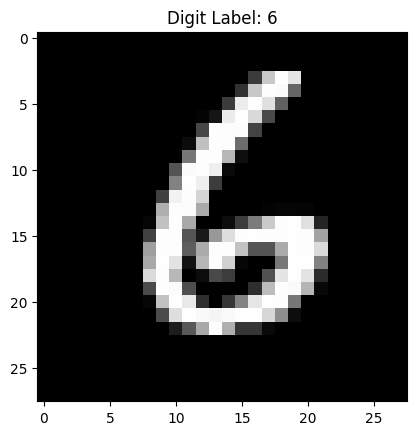

In [3]:
plt.imshow(x_train[6000], cmap='gray')  # Assuming images are grayscale
plt.title(f"Digit Label: {y_train[6000]}")  # Assuming y_train contains the labels
plt.show()

In [4]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
y_train[6000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
#Train the CNN model

In [11]:
batch_size = 128

epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=20,validation_data=(x_test, y_test))
print("The model has successfully trained")


Epoch 1/20


2023-11-30 01:00:23.756650: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 15s 10ms/step - loss: 2.2682 - accuracy: 0.1744 - val_loss: 2.2321 - val_accuracy: 0.3718
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.2080 - accuracy: 0.3107 - val_loss: 2.1542 - val_accuracy: 0.5788
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1224 - accuracy: 0.4426 - val_loss: 2.0424 - val_accuracy: 0.6681
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 1.9989 - accuracy: 0.5356 - val_loss: 1.8816 - val_accuracy: 0.7188
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 1.8267 - accuracy: 0.6005 - val_loss: 1.6648 - val_accuracy: 0.7534
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.6122 - accuracy: 0.6396 - val_loss: 1.4074 - val_accuracy: 0.7843
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.3853 - accuracy: 0.6747 - val_loss: 1.1559 - val_accuracy: 0.8035
Epoch 8/20
469/

In [13]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39975255727767944
Test accuracy: 0.8935999870300293


313/313 [==============================] - 1s 2ms/step


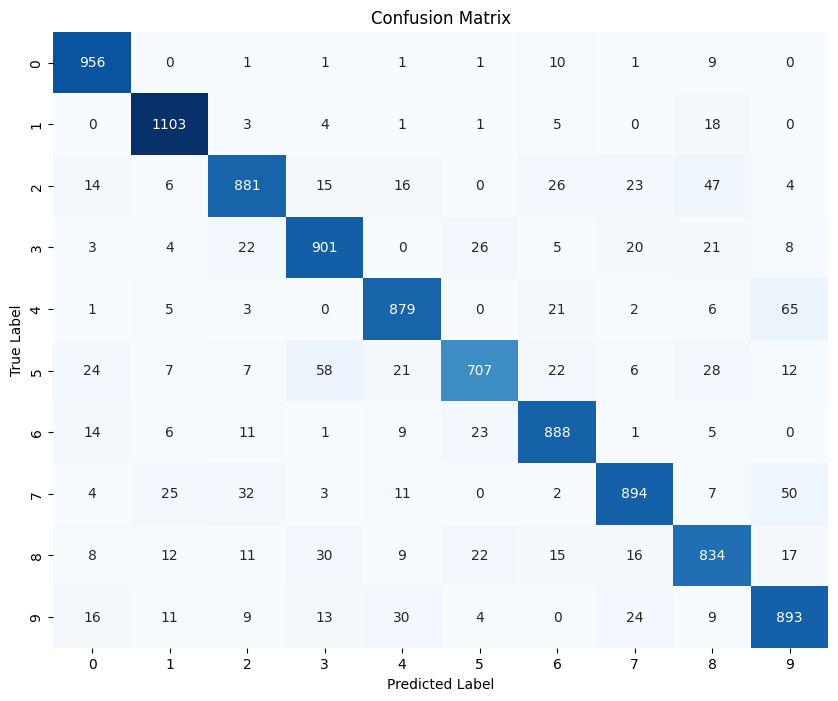

Accuracy: 0.8936

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.94      0.97      0.95      1135
           2       0.90      0.85      0.88      1032
           3       0.88      0.89      0.89      1010
           4       0.90      0.90      0.90       982
           5       0.90      0.79      0.84       892
           6       0.89      0.93      0.91       958
           7       0.91      0.87      0.89      1028
           8       0.85      0.86      0.85       974
           9       0.85      0.89      0.87      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert predictions and true labels from one-hot encoding to integers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print('Accuracy:', accuracy)

# Display classification report
print('\nClassification Report:\n', classification_report(y_true, y_pred_classes))


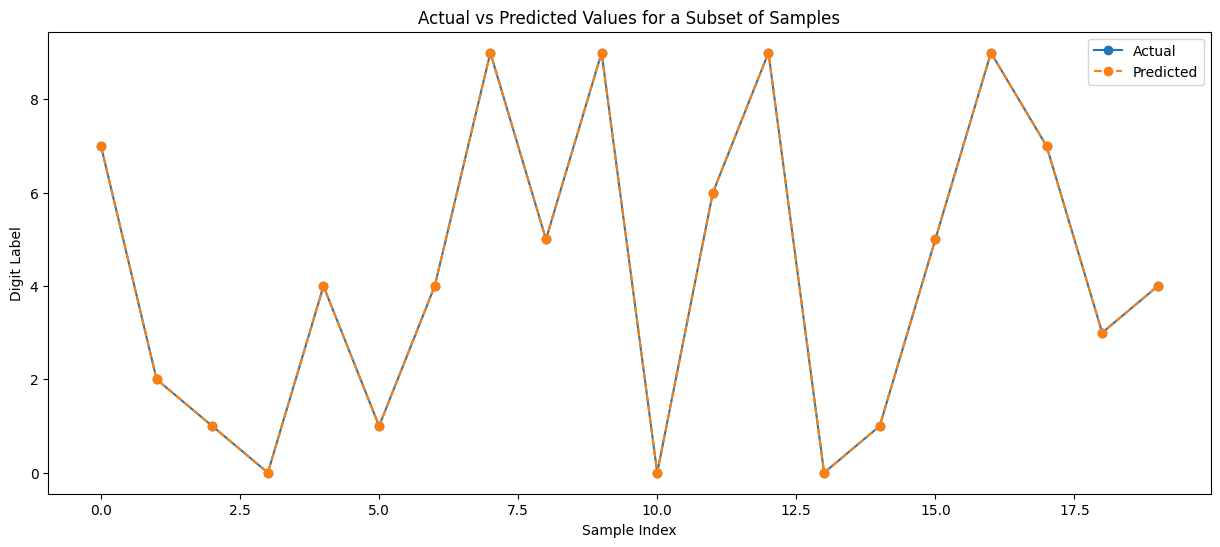

In [16]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred_classes are already defined

# Number of samples to plot (you can adjust this)
num_samples = 20

# Plot actual vs predicted values for a subset of samples
plt.figure(figsize=(15, 6))
plt.plot(range(num_samples), y_true[:num_samples], marker='o', linestyle='-', label='Actual')
plt.plot(range(num_samples), y_pred_classes[:num_samples], marker='o', linestyle='--', label='Predicted')
plt.title('Actual vs Predicted Values for a Subset of Samples')
plt.xlabel('Sample Index')
plt.ylabel('Digit Label')
plt.legend()
plt.show()


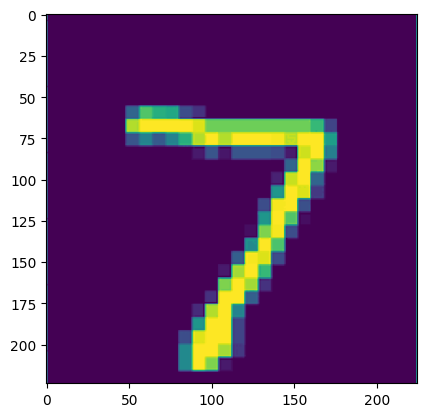

1/1 [==============================] - 0s 73ms/step
Predicted Digit: 7


In [29]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('mnist.h5')

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img, (28, 28))
    #img = img / 255.0
    img = np.reshape(img, (1, 28, 28))  # Reshape to match the model's input shape
    return img

# Example: Replace 'path_to_image.png' with the path to your image
image_path = '/kaggle/input/images-digitdata/digit7.png'
input_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(input_image)



# Get the predicted digit (index of the maximum probability)
predicted_digit = np.argmax(predictions)

print(f'Predicted Digit: {predicted_digit}')
